In [172]:
import pandas as pd
import math
import plotly.express as px
import numpy as np
import seaborn as sns

# Build confidence intervals

* Facebook would like to know the average time spent on their site. To do so, they launched a study on 100 people and asked them how much time they spend on Facebook per day:
    1. Open the `Hours spent on Facebook.xlsx` file. 
    2. Calculate the mean and standard deviation of the dataset.
    3. We would like to know the mean of the total population. Calculate the 95% confidence interval.

1. Visualize dataset distribution

In [173]:
df = pd.read_excel("Hours Spent on Facebook.xlsx")
display(df.head())
print(df.shape)

,Customer,Hours spent on Facebook on Mobile
0,1,4.092475
1,2,7.233371
2,3,7.455792
3,4,7.253503
4,5,2.249682


(102, 2)


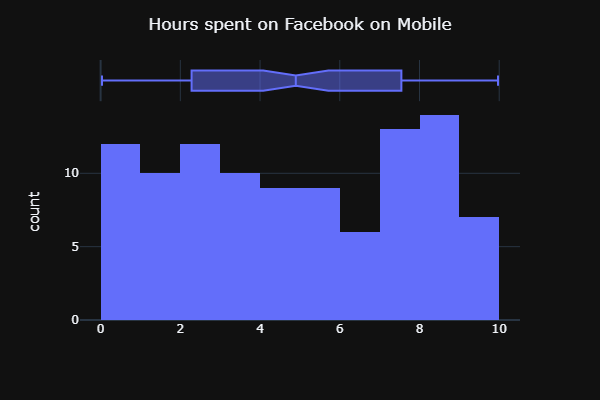

In [174]:
fig = px.histogram(
    df, 
    df.columns[1], 
    height=400, 
    width=600,
    marginal="box"
)

fig.update_layout(
    template="plotly_dark", 
    title=df.columns[1],
    title_x=.5,
    xaxis_title=None
)

fig.show("png")

2. Calculate the mean and standard deviation of the dataset.

In [175]:
def basic_stats(data):
    print(f"Calculating dataset mean :\n\n{data.mean()}")
    print()
    print("----------------")
    print()
    print(f"Calculating dataset standard deviation :\n\n{data.std()}")
    print()
    print("----------------")

    # We can also use .describe() method

    print(f"\nBasic stats :\n {data.describe()}")
    
basic_stats(df)

Calculating dataset mean :

Customer                             51.500000
Hours spent on Facebook on Mobile     4.847316
dtype: float64

----------------

Calculating dataset standard deviation :

Customer                             29.588849
Hours spent on Facebook on Mobile     2.978913
dtype: float64

----------------

Basic stats :
         Customer   Hours spent on Facebook on Mobile
count  102.000000                         102.000000
mean    51.500000                           4.847316
std     29.588849                           2.978913
min      1.000000                           0.034569
25%     26.250000                           2.300628
50%     51.500000                           4.896723
75%     76.750000                           7.529681
max    102.000000                           9.969544


3. We would like to know the mean of the total population. Calculate the 95% confidence interval.

In [176]:
# Confidence interval
# cl = [mu - E, mu + E] # mu = sample mean

# Margin error formula
# E = t * s / sqrt(n)

def confidence_interval(data, col_n):
    
    cl_list = [1.28, 1.96, 3.09]
    
    for cl in cl_list:

        mu = df.iloc[:, col_n].mean()
        t = cl
        s = df.iloc[:,  col_n].std()

        srqt_n = len(data) ** .5

        # Compute the margin of error
        E =  t * s / srqt_n


        cl = [mu - E, mu + E]

        if t == 1.96:
            confidence_level = 95
        elif t == 1.28:
            confidence_level = 80
        elif t == 3.09:
            confidence_level = 99.8


        print(f"We are {confidence_level}% confident that the true mean is bewteen {round(cl[0], 2)} and {round(cl[1], 2)}")
        print("----")

In [177]:
confidence_interval(data=df, col_n=1)

We are 80% confident that the true mean is bewteen 4.47 and 5.22
----
We are 95% confident that the true mean is bewteen 4.27 and 5.43
----
We are 99.8% confident that the true mean is bewteen 3.94 and 5.76
----


___________

## Google

* Google would like to know the mean monthly revenue generated per client on their Adwords platform. Due to lack of time, they have launched a questionnaire on only 30 people.  
    1. Open the `monthly_spending_adwords.xlsx` file.
    2. Calculate the mean and standard deviation of the dataset.
    3. We would like to know the mean of the total population. Calculate the 95% confidence interval.  

1. Visualize dataset distribution

In [178]:
df = pd.read_excel("Monthly spending on adwords.xlsx")
df.head()

,Monthly spending
0,562.460391
1,382.543660
2,947.684175
3,425.084351
4,546.562302


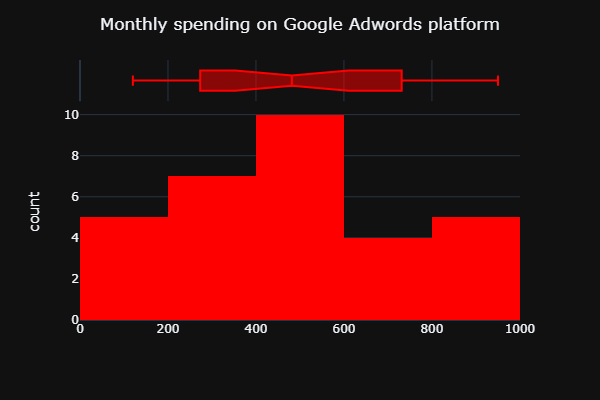

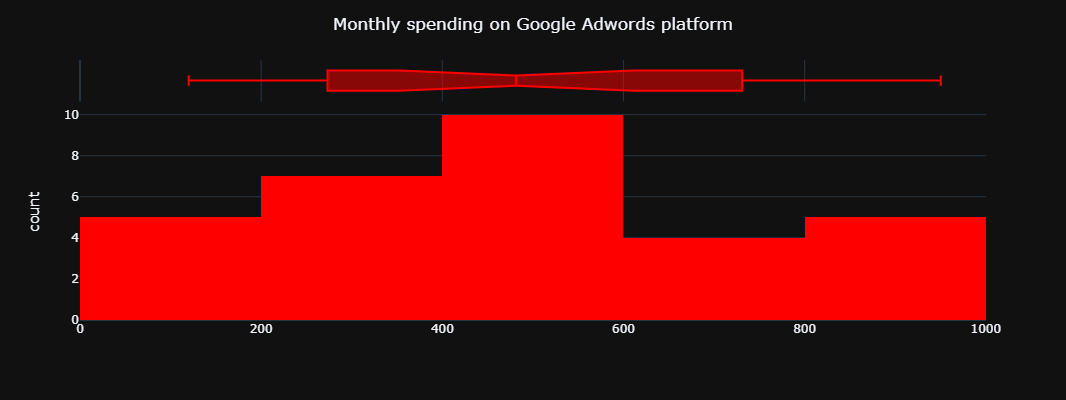

In [180]:
fig = px.histogram(
    df, 
    df.columns[0], 
    height=400, 
    width=600,
    color_discrete_sequence=["red"],
    marginal="box"
)

fig.update_layout(
    template="plotly_dark", 
    title=f"{df.columns[0]} on Google Adwords platform",
    title_x=.5,
    xaxis_title=None
)

fig.show(fig.show("png"))

2. Calculate the mean and standard deviation of the dataset.

In [181]:
basic_stats(df)

Calculating dataset mean :

Monthly spending    491.772858
dtype: float64

----------------

Calculating dataset standard deviation :

Monthly spending    253.962767
dtype: float64

----------------

Basic stats :
        Monthly spending
count         31.000000
mean         491.772858
std          253.962767
min          120.167111
25%          278.149680
50%          481.586651
75%          709.585379
max          950.211726


In [81]:
confidence_interval(data=df, col_n=0)

We are 80% confident that the true mean is bewteen 433.39 and 550.16
----
We are 95% confident that the true mean is bewteen 402.37 and 581.17
----
We are 99.8% confident that the true mean is bewteen 350.83 and 632.72
----


## Nintendo

* Nintendo is building their new console. However, the last console they launched was a disaster because no one bought it. This time, Nintendo would like to know how many cities they would have to survey to be 95% sure that they will build the right number of systems. The company will accept an error of 5000 consoles.  
    1. Visualize dataset distribution
    2. Calculate the mean and standard deviation of the dataset.
    3. Set the margin of error to 5000.
    4. Find the minimum number of cities to study.  

In [182]:
df = pd.read_excel("Number of switch sold.xlsx")
df.head()

,City,Number of sales
0,New York,65538.794054
1,San Francisco,45709.289870
2,Seattle,87417.957092
3,Denver,96461.186529
4,Austin,3665.528408


1. Visualize dataset distribution

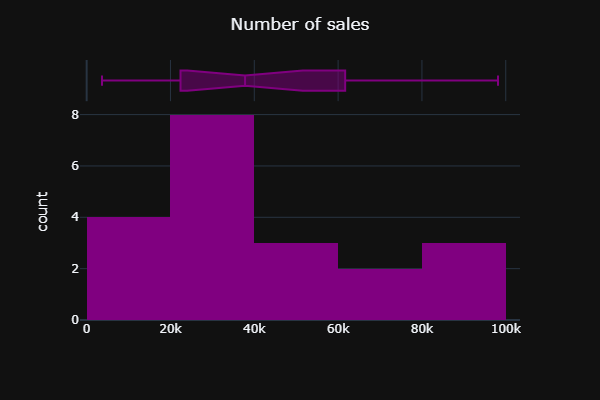

In [185]:
fig = px.histogram(
    df, 
    df.columns[1], 
    height=400, 
    width=600,
    color_discrete_sequence=["purple"],
    marginal="box"
)

fig.update_layout(
    template="plotly_dark", 
    title=f"{df.columns[1]}",
    title_x=.5,
    xaxis_title=None
)

fig.show("png")

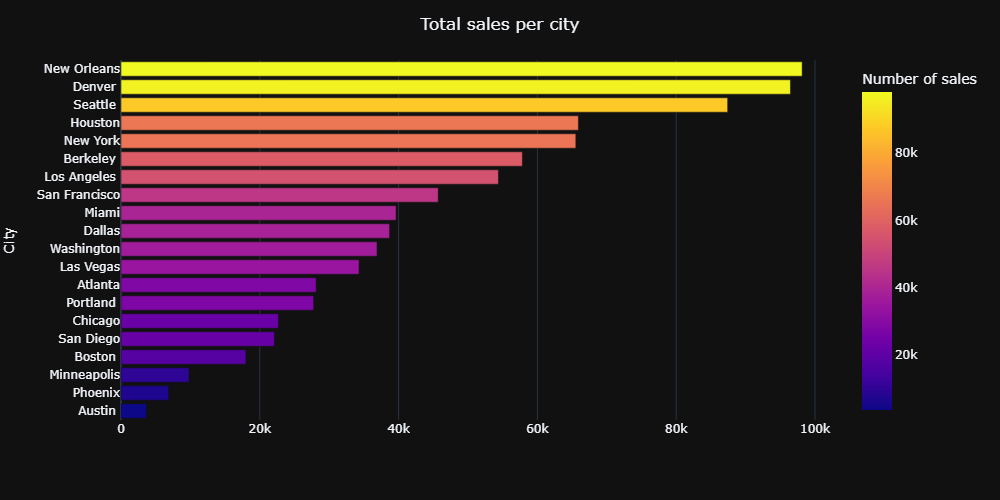

In [184]:
fig = px.bar(
    df.sort_values(by="Number of sales"), 
    y="City",
    x="Number of sales", 
    height=500, 
    width=1000,
    color="Number of sales"
)

fig.update_layout(
    template="plotly_dark", 
    title="Total sales per city",
    title_x=.5,
    xaxis_title=None
)

fig.show("png")

2. Calculate the mean and standard deviation of the dataset.

In [83]:
basic_stats(df)

Calculating dataset mean :

Number of sales    42996.940362
dtype: float64

----------------

Calculating dataset standard deviation :

Number of sales    28365.335357
dtype: float64

----------------

Basic stats :
        Number of sales
count        20.000000
mean      42996.940362
std       28365.335357
min        3665.528408
25%       22542.368436
50%       37796.541276
75%       59758.083526
max       98148.449852


C:\Users\Admin\AppData\Local\Temp/ipykernel_10656/3626053901.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\Admin\AppData\Local\Temp/ipykernel_10656/3626053901.py:6: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [86]:
confidence_interval(df, 1)

We are 80% confident that the true mean is bewteen 34878.31 and 51115.57
----
We are 95% confident that the true mean is bewteen 30565.28 and 55428.6
----
We are 99.8% confident that the true mean is bewteen 23398.05 and 62595.83
----


3. Set the margin of error to 5000.

In [95]:
E = 5000

4. Compute de minimal sample size needed to study

In [93]:
df.head()

,City,Number of sales
0,New York,65538.794054
1,San Francisco,45709.289870
2,Seattle,87417.957092
3,Denver,96461.186529
4,Austin,3665.528408


In [98]:
t = 1.96 # we want to be 95% sure
std = df.iloc[:, 1].std()

n = (t*std/E)**2
print(f"Minimal sample size = {n}")

Minimal sample size = 123.6368634876361


__________

## Apple

* Apple has just launched their new IOS for Iphone and would like to know if customers are satisfied with this version or not. They asked 40 people about their satisfaction with the OS and collected their answers. For educational purposes, we have marked the satisfied with a `1` and the dissatisfied with a `0`.
    1. Open the `satisfaction apple release.xlsx` file.
    2. Set the number n of people in the sample.
    3. Calculate $k$, the number of people satisfied with the OS.
    4. Calculate $p$, the proportion of people satisfied with the OS.
    5. Calculate the confidence interval of the proportion of the population.

In [186]:
df = pd.read_excel("satisfaction apple release.xlsx")
display(df.head())
df.shape

,Satisfied customer
0,0
1,0
2,0
3,0
4,0


(41, 1)

In [187]:
df["Satisfied customer"] = df["Satisfied customer"].apply(lambda x: "Satisfied" if x == 1
                                                         else "Dissatisfied")

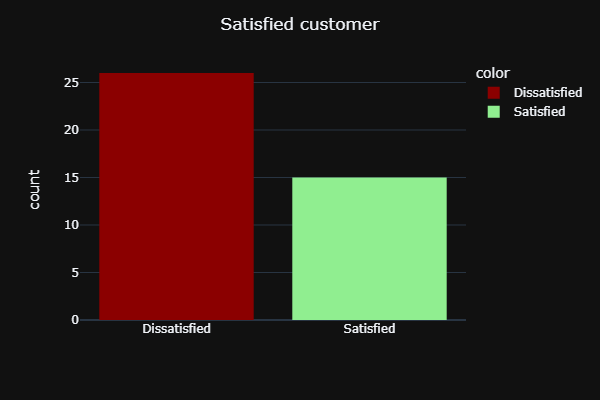

In [188]:
x = df[df.columns[0]].astype(str)

fig = px.histogram(
    df, 
    x=x, 
    height=400, 
    width=600,
    color=x,
    color_discrete_sequence=["darkred", "lightgreen"]
)

fig.update_layout(
    template="plotly_dark", 
    title=df.columns[0],
    title_x=.5,
    xaxis_title=None
)

fig.show("png")

 2. Set the number n of people in the sample.
 3. Calculate $k$, the number of people satisfied with the OS.
 4. Calculate $p$, the proportion of people satisfied with the OS.
 5. Calculate the confidence interval of the proportion of the population.

In [170]:
# Calculate total number of people
n = len(df)

# Calculate number of people satisfied
k = df[df['Satisfied customer'] == "Satisfied"].count()[0]

# Calculate percentage of satisfied people
p = k/n


# Set Z Value : we use the normal distribution because the FINAL sample size n will probably be > 40
z = 1.96

# Calculate interval
real_percentage = [(p - z*math.sqrt(p*(1-p)/n)) * 100, (p + z*math.sqrt(p*(1-p)/n)) * 100]

print(f"Number of people in the sample : {n}\n")
print(f"Number of people satisfied with the OS : {k}\n")
print(f"Proportion of people satisfied with the OS : {round(p*100,2)}%\n")
print(f"We are 95% confident that real percentage is between {round(real_percentage[0], 2)}% and {round(real_percentage[1], 2)}%")

Number of people in the sample : 41

Number of people satisfied with the OS : 15

Proportion of people satisfied with the OS : 36.59%

We are 95% confident that real percentage is between 21.84% and 51.33%
